# <center> Статистика(4)
## <center>Домашняя работа №6
## <center>Кейс стади 1  
#### Выполнила: Александра Ольховатова
#### группа: pyda-8a

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [75]:
import io
import requests
import ssl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

**1. Загрузить датасет**

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)

In [3]:
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


**Содержание файла**

Наборы данных содержат транзакции, совершенные с помощью кредитных карт в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, которые произошли за два дня, и у нас 492 мошенничества из 284 807 транзакций. 

Функции V1, V2,… V28 являются основными компонентами, полученными с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма». 

Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. 

Функция «Сумма» - это сумма транзакции, эта функция может использоваться для примера, зависящего от стоимости обучения. 

Функция «Класс» - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**Ответ:** Нулевых значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [126]:
def deal(row):
    class_ = row.Class
    if class_ == 0:
        row['honest'] = 1
    else:
        row['fraud'] = 1
    return row

In [127]:
dataset_deal = dataset.apply(deal, axis=1)

In [182]:
#dataset_deal.info()

In [179]:
dataset_deal = dataset_deal.fillna(0)

In [181]:
#dataset_deal.info()

In [183]:
print('Количество элементов в 1 классе (честная сделака):', dataset_deal[dataset_deal['honest']==1].shape)
print('Количество элементов в 2 классе (обманная сделака):', dataset_deal[dataset_deal['fraud']==1].shape)

Количество элементов в 1 классе (честная сделака): (284315, 33)
Количество элементов в 2 классе (обманная сделака): (492, 33)


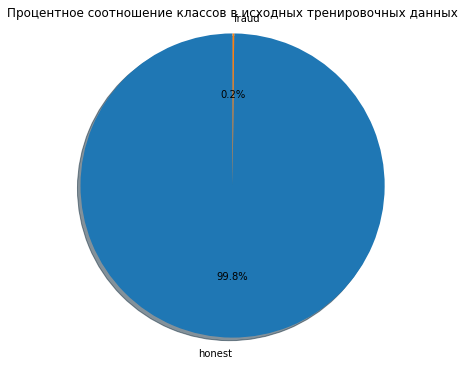

In [184]:
labels = 'honest', 'fraud'
sizes = [284315, 492]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
plt.title('Процентное соотношение классов в исходных тренировочных данных')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

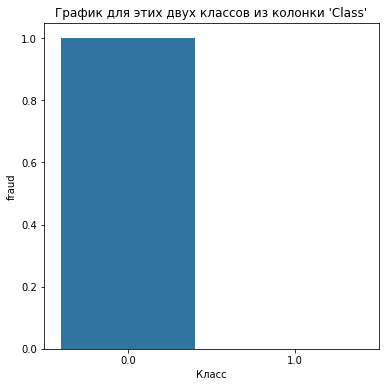

In [185]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(dataset_deal['honest'],dataset_deal['fraud'])
plt.xlabel('Класс')
plt.title("График для этих двух классов из колонки 'Class'")
plt.show()

Думаю на этом графике просто не видно 1, т.к их очень мало по сравнению с 0. 

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [186]:
amount_money_honest = dataset[dataset['Class']==0]['Amount']
amount_money_fraud = dataset[dataset['Class']==1]['Amount']
print('Использованных денег в честных операциях:', amount_money_honest.sum())
print('Использованных денег в обманных операциях:', amount_money_fraud .sum())

Использованных денег в честных операциях: 25102462.04
Использованных денег в обманных операциях: 60127.97


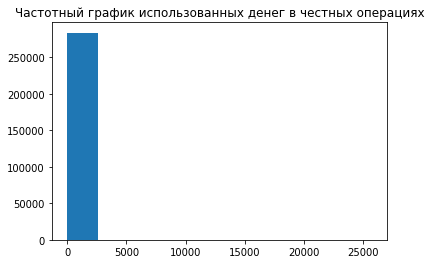

In [187]:
plt.hist(amount_money_honest)
plt.title('Частотный график использованных денег в честных операциях')
plt.show()

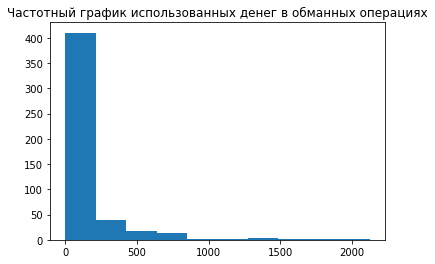

In [188]:
plt.hist(amount_money_fraud)
plt.title('Частотный график использованных денег в обманных операциях')
plt.show()

**5. Построить графики histograms для всех значений**

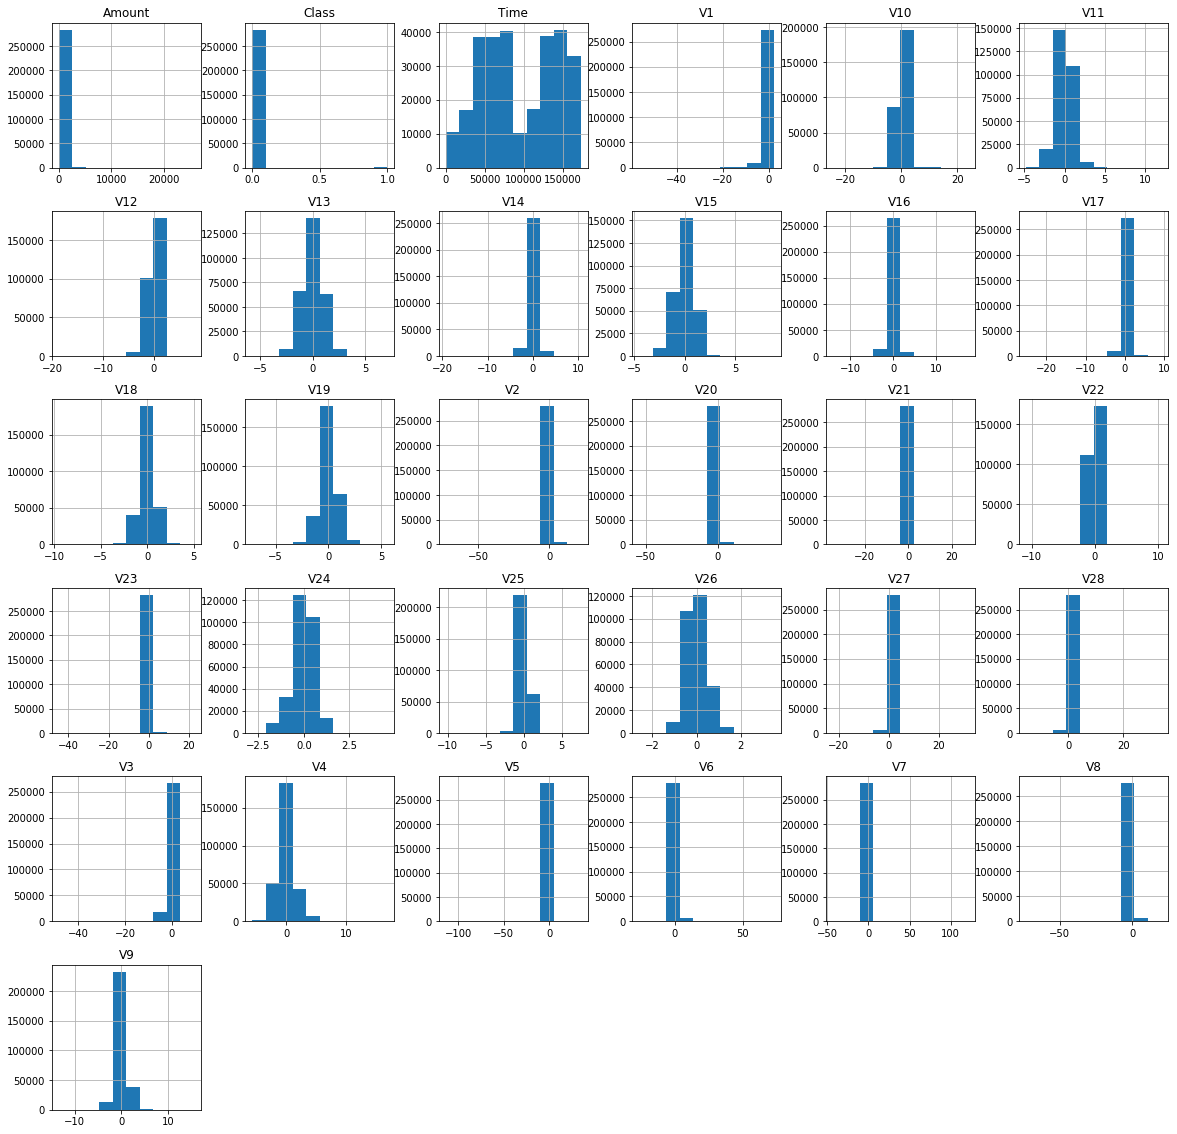

In [189]:
dataset.hist(figsize=(20,20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

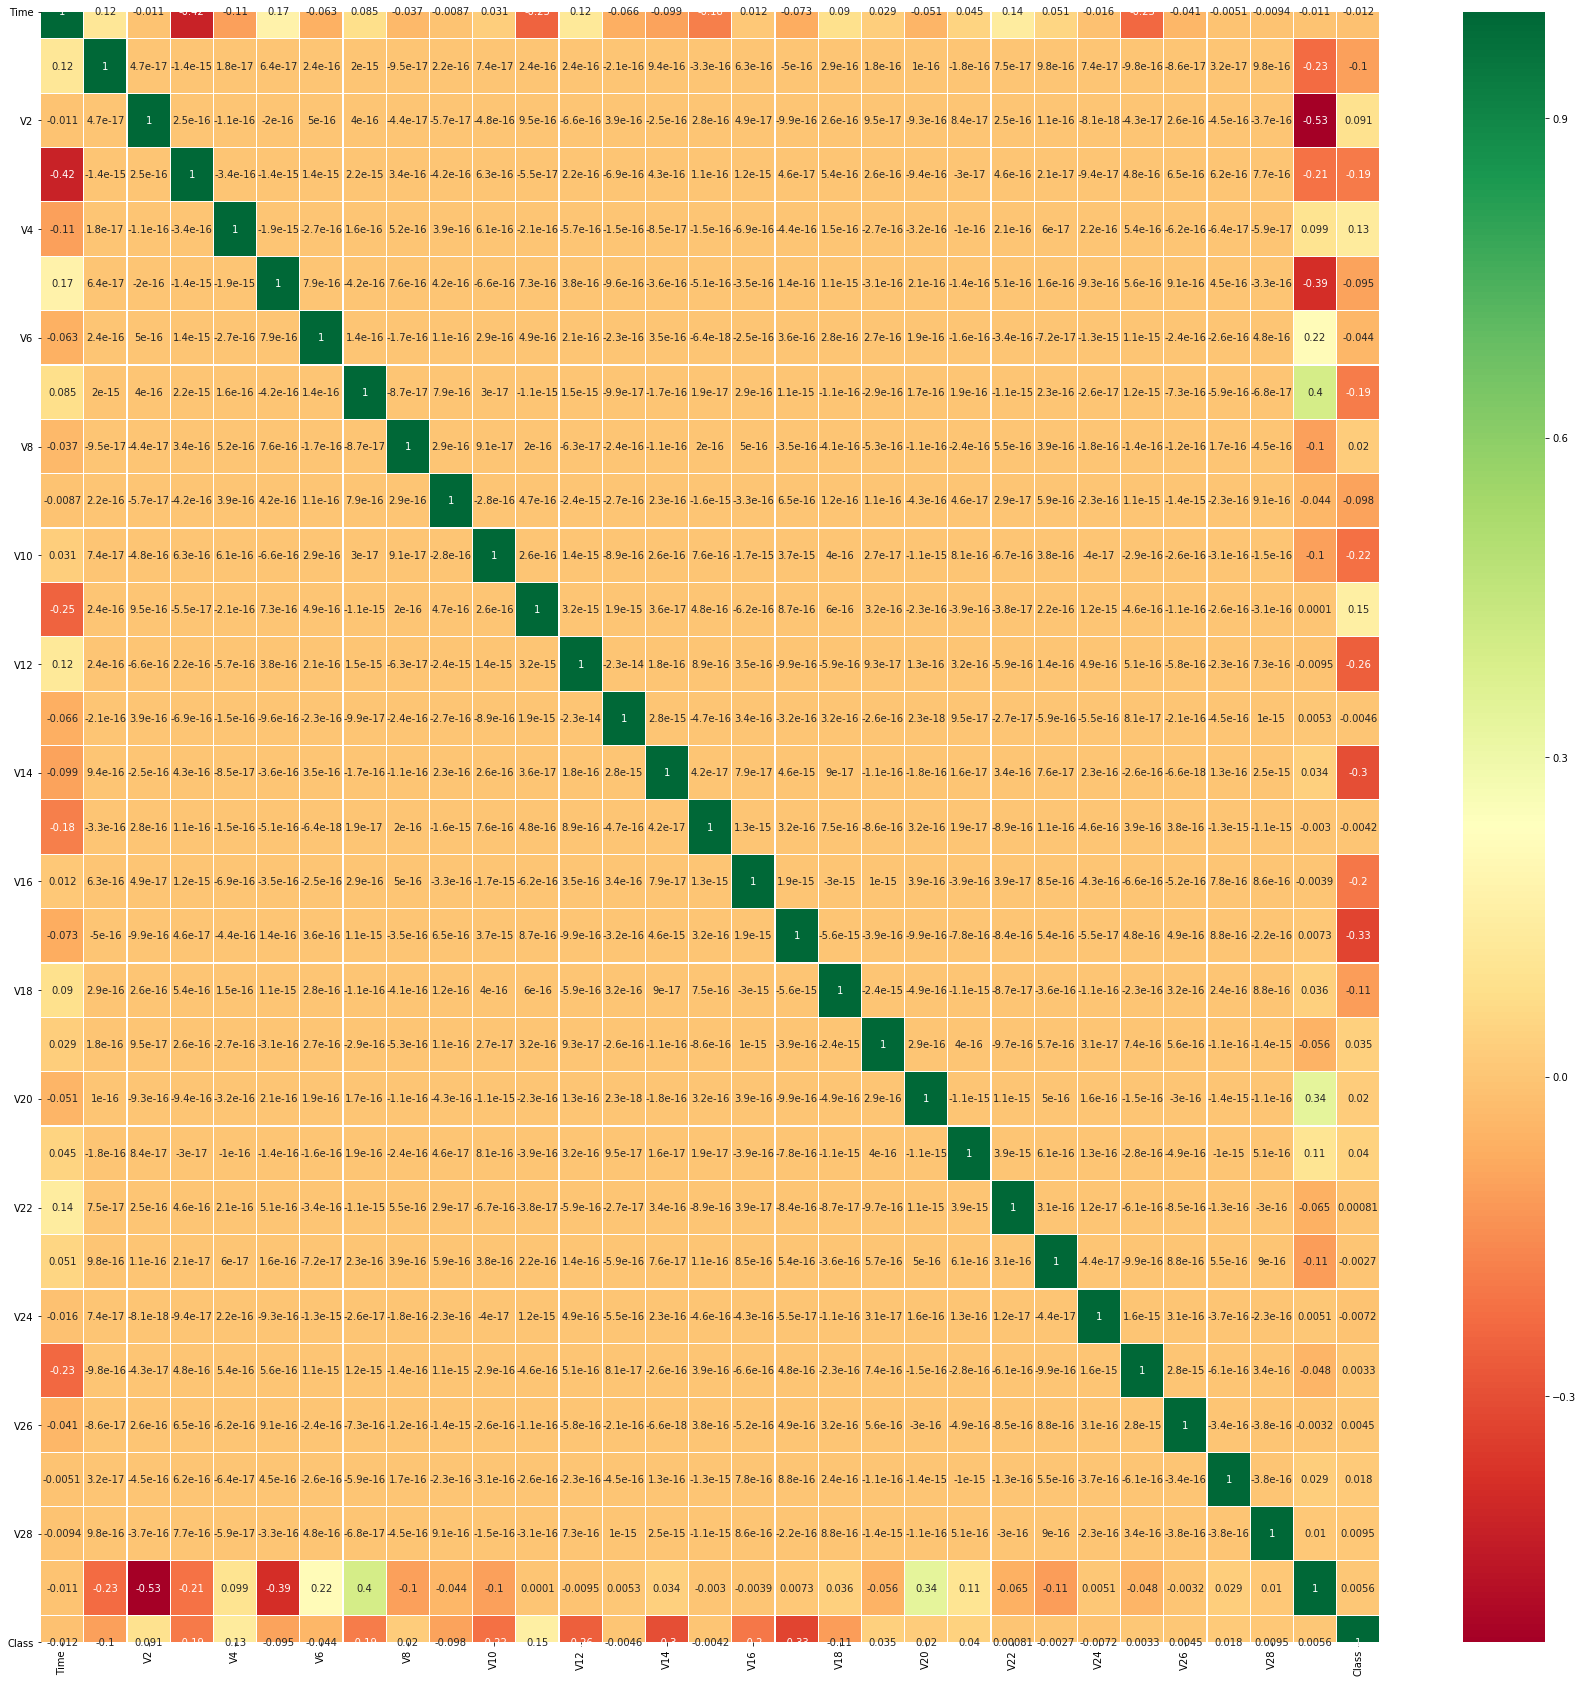

In [12]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель деревья решений

In [219]:
dataset_deal = dataset_deal.drop(['Class'], axis=1)

In [227]:
output_y = dataset_deal.iloc[:,30:]
input_x = dataset_deal

In [228]:
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

honest    284315
fraud        492
dtype: int64


In [229]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [230]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

Classification report:

In [231]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00     85307

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

Модель "рандомных деревьев" дала точность предсказания порядка 100%.

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [232]:
headers = list(dataset_deal.columns.values)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset_deal)
dataset_norm = pd.DataFrame(np_scaled)
dataset_norm.columns = headers

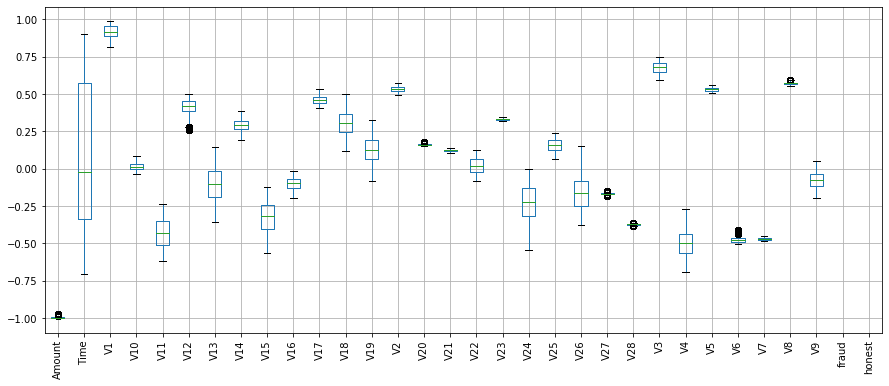

In [233]:
low = .05
high = .95
quant_dataset = dataset_norm.quantile([low, high])

filt_dataset = dataset_norm.apply(lambda x: x[(x>quant_dataset.loc[low,x.name]) & 
                                    (x < quant_dataset.loc[high,x.name])], axis=0)

boxplot = filt_dataset.boxplot(figsize=(15,6), rot=90) #просто ради интереса построила график

In [239]:
output_y_norm = dataset_norm.iloc[:,30:]
input_x_norm = dataset_norm

In [240]:
le=LabelEncoder()
targets_norm=(output_y_norm.iloc[:,:]==1).idxmax(1)
print(targets_norm.value_counts())
Y_norm=le.fit_transform(targets_norm)

honest    284315
fraud        492
dtype: int64


In [241]:
X_train_22_norm, X_test_22_norm, y_train_22_norm, y_test_22_norm = train_test_split(input_x_norm, Y_norm, test_size=0.3)

In [242]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model_norm=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_norm.fit(X_train_22_norm,y_train_22_norm)

RandomForestClassifier()

In [243]:
model_pred_norm = model_norm.predict(X_test_22_norm)

print(classification_report(y_test_22_norm, model_pred_norm))

model_norm.score(X_test_22_norm, y_test_22_norm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00     85281

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

Модель "рандомных деревьев" дала точность предсказания порядка 100%. Можно сделать вывод что точность порядка предсказания не изменилась при нормализации данных, соответсвенно ее можно было не делать

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [211]:
X_train_norm,X_test_norm,y_train_norm,y_test_norm = train_test_split(dataset_norm,
                                                 Y_norm,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

Увеличиваю количество тренировочных данных (тестовые данные остаются нетронутыми)

In [212]:
ros = RandomOverSampler(random_state=0)

ros.fit(X_train_norm, y_train_norm)
X_resampled, y_resampled = ros.fit_sample(X_train_norm, y_train_norm)
print('Количество элементов до операции:', len(X_train_norm))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


Увеличила количество элементов, и уравняла классы по количеству

In [213]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199024, 1: 199024}

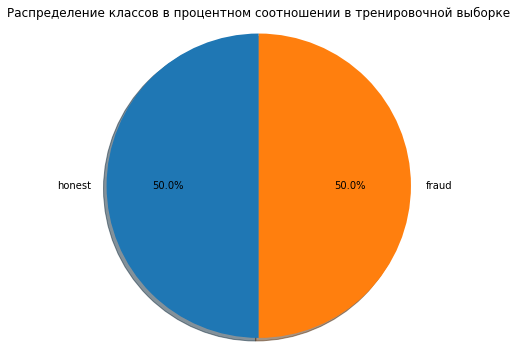

In [214]:
# Построим pie-график
labels = 'honest', 'fraud'  
sizes = [199024, 199024]
explode = (0, 0) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тренировочной выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [215]:
unique, counts = np.unique(y_test_norm, return_counts=True)
dict(zip(unique, counts))

{0: 152, 1: 85291}

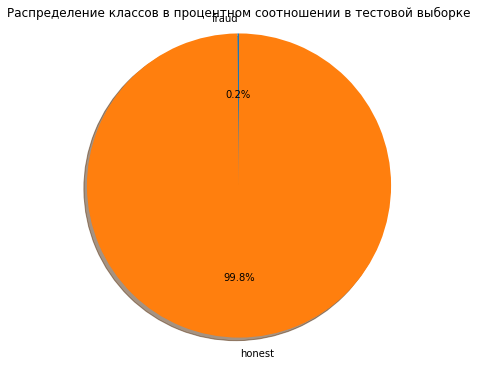

In [216]:
# Построем pie-график
labels = 'fraud', 'honest'
sizes = [152, 85291]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тестовой выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()